In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

# Part 1

### a)

In [2]:
def plot_attack(G, network_name, step):
    
    if not nx.is_connected(G):
        #print("graph not connected! From now on the largest component will be considered as the graph")  
        G =  G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0]).copy()
    
    print("Number of nodes of the giant component: ", nx.number_of_nodes(G))

    G_random_attack = G.copy()
    G_betweenness_attack = G.copy()
    G_pagerank_attack = G.copy()
    G_high_dregree_attack = G.copy()

    tot_nodes = nx.number_of_nodes(G)
    f_list = np.arange(0, (1 + step/tot_nodes), step/tot_nodes)

    # BETWEENNESS    
    diameter_list_betweenness = np.zeros(len(f_list))
    giant_component_size_list_betweeness = np.zeros(len(f_list))
 
    i = 0
    print("\n\nBetwenness Attack: \n\n")
    while nx.number_of_nodes(G_betweenness_attack) >= step+1 and i < len(f_list): 
        #find node with highest betweenness
        
        betweenness_dict = nx.betweenness_centrality(G_betweenness_attack)
        sorted_key = sorted(betweenness_dict, key=betweenness_dict.get, reverse=True)

        ##Remove nodes with highest betweenness
        G_betweenness_attack.remove_nodes_from(sorted_key[:step])

        if not nx.is_connected(G_betweenness_attack) :
            #print("graph not connected! From now on the largest component will be considered as the graph")  
            G_betweenness_attack =  G_betweenness_attack.subgraph( sorted(nx.connected_components(G_betweenness_attack), key=len, reverse=True)[0]).copy()
        
       
        print("Step: ", i)
        giant_component_size_list_betweeness[i] = nx.number_of_nodes(G_betweenness_attack)
        diameter_list_betweenness[i] = nx.diameter(G_betweenness_attack)
        print("Remaining Nodes: {}".format(nx.number_of_nodes(G_betweenness_attack)))
        
        i += 1
       

    
    # HIGH DEGREE 
    diameter_list_deg = np.zeros(len(f_list))
    giant_component_size_list_deg = np.zeros(len(f_list))
    i =0
    print("\n\nHigh Degree Attack: \n\n")
    while nx.number_of_nodes(G_high_dregree_attack) >= step+1 and i < len(f_list): 
        # degree of the nodes
        degree_dict = dict(G_high_dregree_attack.degree)
        sorted_key = sorted(degree_dict, key=degree_dict.get, reverse=True)
       
        #remove node with highest degree
        G_high_dregree_attack.remove_nodes_from(sorted_key[:step])
   
        if not nx.is_connected(G_high_dregree_attack):
            #print("graph not connected! From now on the largest component will be considered as the graph")  
            G_high_dregree_attack =  G_high_dregree_attack.subgraph(sorted(nx.connected_components(G_high_dregree_attack), key=len, reverse=True)[0]).copy()
            
      
        print("Step: ", i)
        giant_component_size_list_deg[i] = nx.number_of_nodes(G_high_dregree_attack)
        diameter_list_deg[i] = nx.diameter(G_high_dregree_attack)
        print("Remaining Nodes: {}".format(nx.number_of_nodes(G_high_dregree_attack)))

        i += 1
        

    # RANDOM NODE
    diameter_list_random = np.zeros(len(f_list))
    giant_component_size_list_random = np.zeros(len(f_list))
    i = 0

    print("\n\nRandom Attack: \n\n")
    while nx.number_of_nodes(G_random_attack) >= step+1 and i < len(f_list): 

        #pick random node
        nodes_list = list(G_random_attack.nodes)
        random_nodes = random.sample(nodes_list, step)
        #remove random node
        
        G_random_attack.remove_nodes_from(random_nodes)

        if not nx.is_connected(G_random_attack):
            #print("graph not connected! From now on the largest component will be considered as the graph")  
            G_random_attack =  G_random_attack.subgraph(sorted(nx.connected_components(G_random_attack), key=len, reverse=True)[0]).copy()
            
        print("Step: ", i)
        giant_component_size_list_random[i] = nx.number_of_nodes(G_random_attack)
        diameter_list_random[i] = nx.diameter(G_random_attack)
        print("Remaining Nodes: {}".format(nx.number_of_nodes(G_random_attack)))

        i += 1
        
    
    #PAGERANK
    
    diameter_list_pagerank = np.zeros(len(f_list))
    giant_component_size_list_pagerank = np.zeros(len(f_list))

    i = 0
    print("\n\nPagerank Attack: \n\n")
    while nx.number_of_nodes(G_pagerank_attack) >= step+1 and i < len(f_list): 
        # computing page rank
        pageRank_dict = nx.pagerank(G_pagerank_attack)

        #pick the step nodes with maximum pagerank
        sorted_key = sorted(pageRank_dict, key=pageRank_dict.get, reverse=True)

        #remove the node with highest pagerank
        G_pagerank_attack.remove_nodes_from( sorted_key[:step] )

        if not nx.is_connected(G_pagerank_attack):
            #print("graph not connected! From now on the largest component will be considered as the graph")  
            G_pagerank_attack =  G_pagerank_attack.subgraph(sorted(nx.connected_components(G_pagerank_attack), key=len, reverse=True)[0]).copy()
            
        print("Step: ", i)       
        giant_component_size_list_pagerank[i] = nx.number_of_nodes(G_pagerank_attack)
        diameter_list_pagerank[i] = nx.diameter(G_pagerank_attack)
        print("Remaining Nodes: {}".format(nx.number_of_nodes(G_pagerank_attack)))

        i += 1
       

    

    plt.figure( figsize=(15,10))

    plt.plot(f_list, giant_component_size_list_betweeness/tot_nodes, label="Betweenness Attack", lw=3)
    plt.plot(f_list, giant_component_size_list_random/tot_nodes, label="Random Node Attack", lw=3)
    plt.plot(f_list, giant_component_size_list_deg/tot_nodes, label="High Degree Node Attack", lw=3)
    plt.plot(f_list, giant_component_size_list_pagerank/tot_nodes, label="Pagerank Attack", lw=3)

    plt.xlabel("f", fontsize=15)
    plt.ylabel("Giant Component Size ( fraction ) ", fontsize=15)
    plt.title(network_name + " Giant Component Size", fontsize=20)
    plt.legend(fontsize=15)
    plt.savefig("images/"+network_name+"_giant_component_size.png")


    plt.figure( figsize=(15,10))

    plt.plot(f_list, diameter_list_betweenness, label="Betweenness Attack", lw=3)
    plt.plot(f_list, diameter_list_random, label="Random Node Attack", lw=3)
    plt.plot(f_list, diameter_list_deg, label="High Degree Node Attack", lw=3)
    plt.plot(f_list, diameter_list_pagerank, label="Pagerank Attack", lw=3)

    plt.xlabel("f", fontsize=15)
    plt.ylabel("Diameter ", fontsize=15)
    plt.title(network_name+" Diameter", fontsize=20)
    plt.legend(fontsize=15)
    plt.savefig("images/"+network_name+"_diameter.png")


## Karate Club Graph

In [3]:
G = nx.karate_club_graph()

# number of nodes
N = nx.number_of_nodes(G)
print("Number of nodes: ", N)

# number of links
print("Number of edges: ", nx.number_of_edges(G))

# average degree
print("Average degree: ", sum([d for n, d in G.degree()])/nx.number_of_nodes(G))

# Density
print("Density: ", nx.density(G))

# Global clustering
print("Global clustering: ", nx.transitivity(G))

# Average clustering
print("Average clustering: ", nx.average_clustering(G))

Number of nodes:  34
Number of edges:  78
Average degree:  4.588235294117647
Density:  0.13903743315508021
Global clustering:  0.2556818181818182
Average clustering:  0.5706384782076823


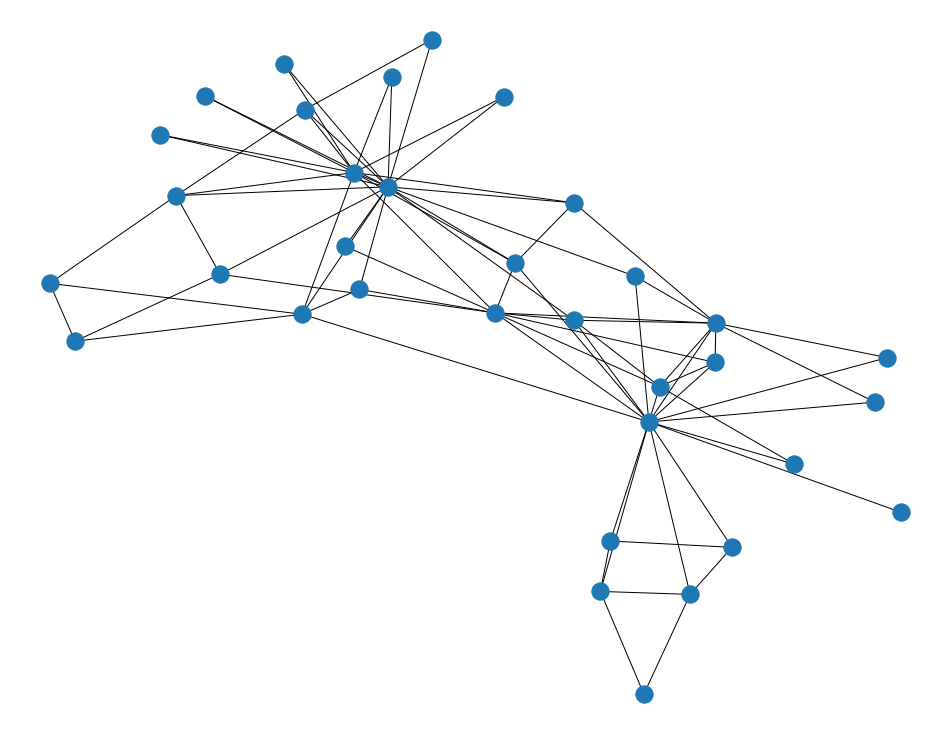

In [4]:
plt.figure( figsize=(13, 10))
nx.draw(G)

Number of nodes of the giant component:  34


Betwenness Attack: 


Step:  0
Remaining Nodes: 27
Step:  1
Remaining Nodes: 26
Step:  2
Remaining Nodes: 20
Step:  3
Remaining Nodes: 10
Step:  4
Remaining Nodes: 4
Step:  5
Remaining Nodes: 1


High Degree Attack: 


Step:  0
Remaining Nodes: 33
Step:  1
Remaining Nodes: 26
Step:  2
Remaining Nodes: 20
Step:  3
Remaining Nodes: 16
Step:  4
Remaining Nodes: 8
Step:  5
Remaining Nodes: 5
Step:  6
Remaining Nodes: 3
Step:  7
Remaining Nodes: 1


Random Attack: 


Step:  0
Remaining Nodes: 33
Step:  1
Remaining Nodes: 32
Step:  2
Remaining Nodes: 31
Step:  3
Remaining Nodes: 30
Step:  4
Remaining Nodes: 29
Step:  5
Remaining Nodes: 28
Step:  6
Remaining Nodes: 27
Step:  7
Remaining Nodes: 26
Step:  8
Remaining Nodes: 25
Step:  9
Remaining Nodes: 24
Step:  10
Remaining Nodes: 23
Step:  11
Remaining Nodes: 22
Step:  12
Remaining Nodes: 21
Step:  13
Remaining Nodes: 19
Step:  14
Remaining Nodes: 18
Step:  15
Remaining Nodes: 8
Step:  16
Remainin

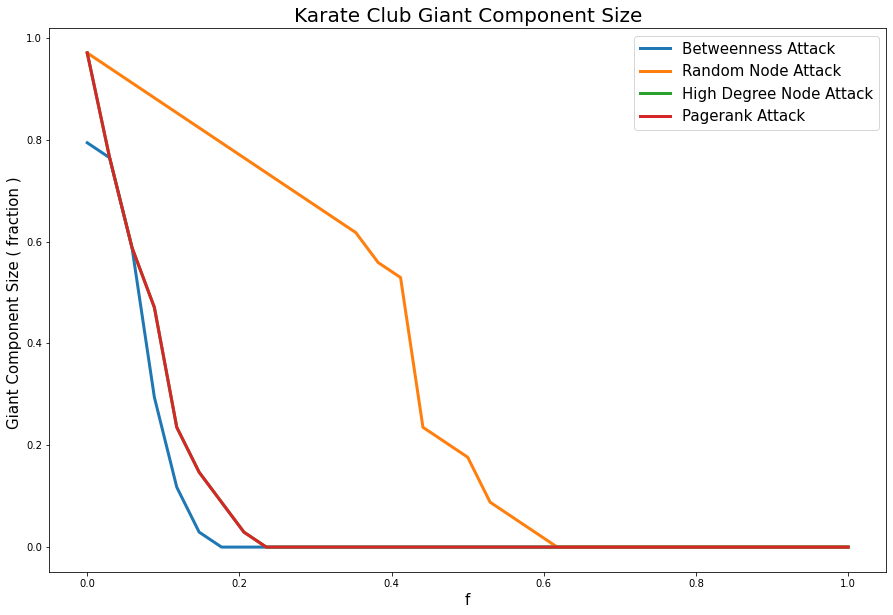

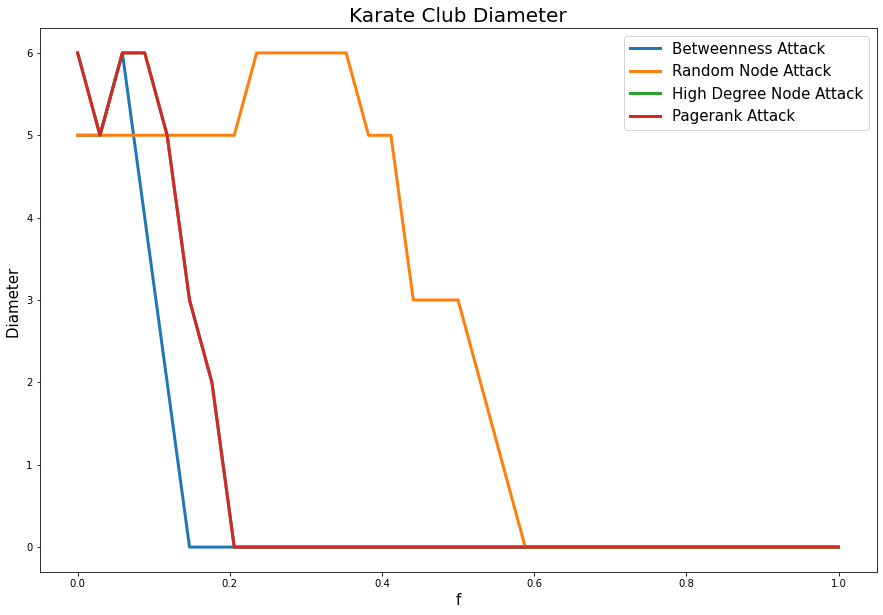

In [5]:
plot_attack(G, "Karate Club", 1)

### Random Graph - Erdos Renyi Graph

In [6]:
G = nx.erdos_renyi_graph(200, 0.1, seed=123, directed=False)

# number of nodes
N = nx.number_of_nodes(G)
print("Number of nodes: ", N)

# number of links
print("Number of edges: ", nx.number_of_edges(G))

# average degree
print("Average degree: ", sum([d for n, d in G.degree()])/nx.number_of_nodes(G))

# Density
print("Density: ", nx.density(G))

# Global clustering
print("Global clustering: ", nx.transitivity(G))

# Average clustering
print("Average clustering: ", nx.average_clustering(G))

Number of nodes:  200
Number of edges:  2017
Average degree:  20.17
Density:  0.10135678391959799
Global clustering:  0.10058265850286391
Average clustering:  0.09894891209339168


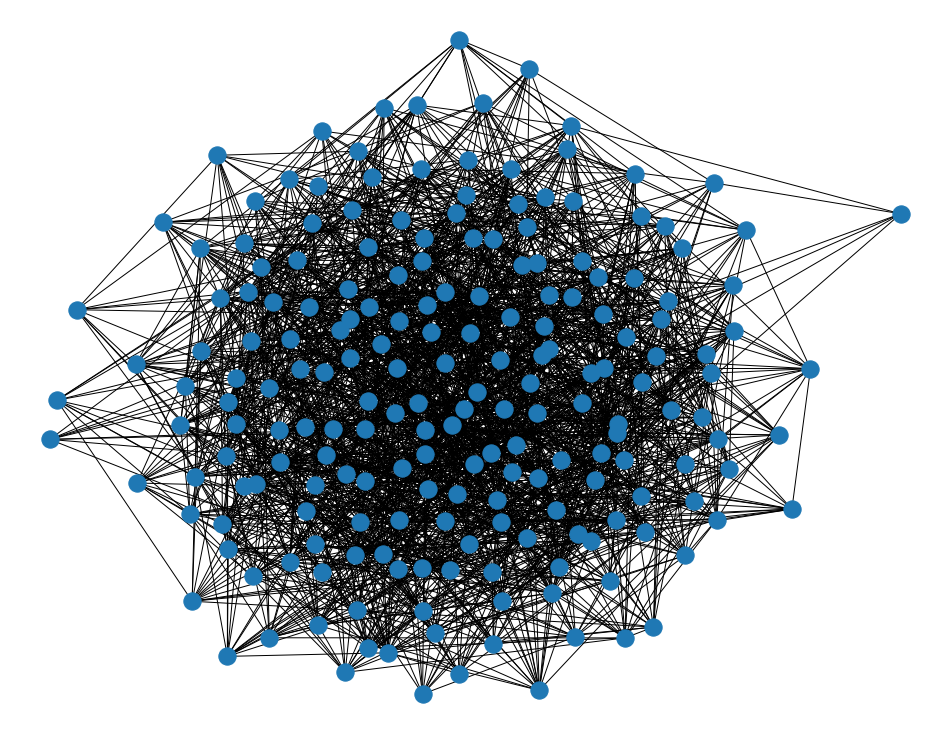

In [7]:
plt.figure( figsize=(13, 10))
nx.draw(G)

# Part 2

In [9]:
def load_dataset(sample = False, K = None):
    
    # if sample == True then only K randomly selected nodes are loaded
    
    # create graph
    G = nx.Graph()
    node_list = []

    with open("dataset/facebook_combined.edges") as edges:
        
        
        for row in edges:
            if len(row.split(" ")) == 1:
                continue
        
            source, target = row.split(" ")[:2]
            source = int(source)
            target = int(target)
            
            # add all the nodes and the edges
            if not sample:
                # add nodes if not in yet
                if source not in G:
                    G.add_node(source)
        
                if target not in G:
                    G.add_node(target)
        
                # add edge
                G.add_edge(source, target)
                
            else:
                # prepare the list to randomply sample
                
                if source not in node_list:
                    node_list.append(source)
                    
                if target not in node_list:
                    node_list.append(target)
        
        if sample:
            node_list = random.sample(node_list , k = K)
                    
            # add all the selected node
            for node in node_list:
                    if node not in G:
                        G.add_node(node)
                            
            # add all the edges linking the selected nodes
            for row in edges:
                if len(row.split(" ")) == 1:
                    continue
        
                source, target = row.split(" ")[:2]
                source = int(source)
                target = int(target)
                
                if source in G and target in G:
                    # add edge
                    G.add_edge(source, target)
        return G



## Facebook Circles Combined

In [10]:
# load graph with all nodes
G = load_dataset()
# number of nodes
N = nx.number_of_nodes(G)
print("Number of nodes: ", N)

# number of links
print("Number of edges: ", nx.number_of_edges(G))

# average degree
print("Average degree: ", sum([d for n, d in G.degree()])/nx.number_of_nodes(G))

# Density
print("Density: ", nx.density(G))

# Global clustering
print("Global clustering: ", nx.transitivity(G))

# Average clustering
print("Average clustering: ", nx.average_clustering(G))


Number of nodes:  4039
Number of edges:  88234
Average degree:  43.69101262688784
Density:  0.010819963503439287
Global clustering:  0.5191742775433075
Average clustering:  0.6055467186200876


26
Remaining Nodes: 363
Step:  27
Remaining Nodes: 351
Step:  28
Remaining Nodes: 300
Step:  29
Remaining Nodes: 283
Step:  30
Remaining Nodes: 272
Step:  31
Remaining Nodes: 253
Step:  32
Remaining Nodes: 239
Step:  33
Remaining Nodes: 228
Step:  34
Remaining Nodes: 218
Step:  35
Remaining Nodes: 206
Step:  36
Remaining Nodes: 193
Step:  37
Remaining Nodes: 183
Step:  38
Remaining Nodes: 173
Step:  39
Remaining Nodes: 163
Step:  40
Remaining Nodes: 153
Step:  41
Remaining Nodes: 142
Step:  42
Remaining Nodes: 132
Step:  43
Remaining Nodes: 122
Step:  44
Remaining Nodes: 111
Step:  45
Remaining Nodes: 95
Step:  46
Remaining Nodes: 77
Step:  47
Remaining Nodes: 63
Step:  48
Remaining Nodes: 27
Step:  49
Remaining Nodes: 12
Step:  50
Remaining Nodes: 1


High Degree Attack: 


Step:  0
Remaining Nodes: 3957
Step:  1
Remaining Nodes: 3944
Step:  2
Remaining Nodes: 3934
Step:  3
Remaining Nodes: 3924
Step:  4
Remaining Nodes: 3914
Step:  5
Remaining Nodes: 3904
Step:  6
Remaining Nodes: 38

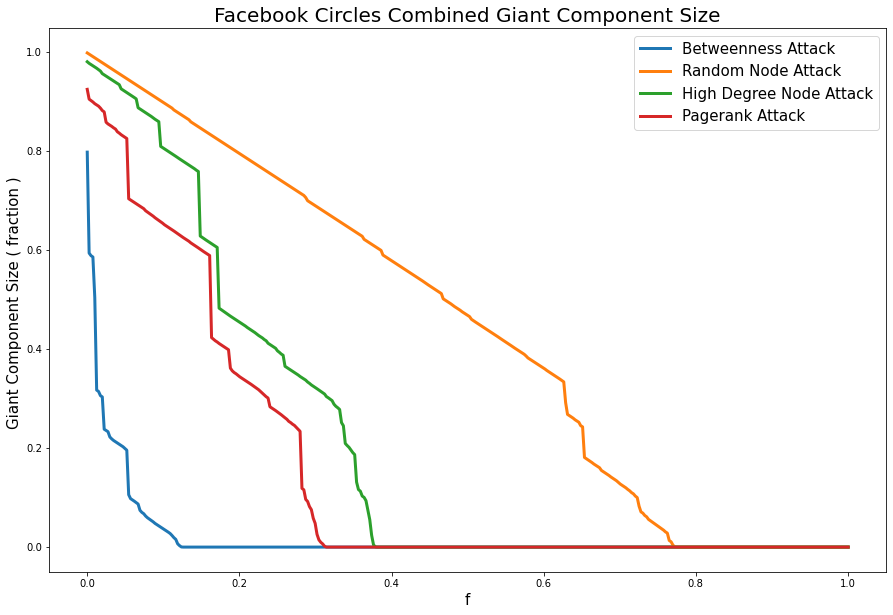

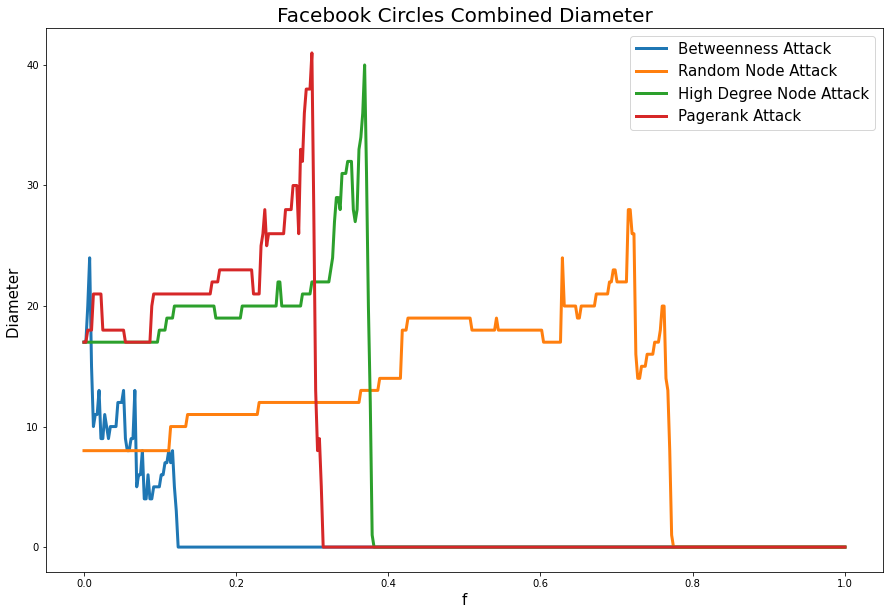

In [11]:
plot_attack(G, "Facebook Circles Combined",10)